<a href="https://colab.research.google.com/github/franci-i/AIREHAB/blob/main/ai_reha_health_hs24_poject_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI in Rehabilitation & Healthcare - Group Project - SUVA Analgesics**

## **Step 0: Import the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install PyDrive library if not already installed
!pip install -U -q PyDrive

# Import necessary libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Replace 'your-file-id' with the actual file ID from your shared file
file_id = '1xBcZ78gzIM7O3V2Vomnqvcm3ezW12nwU'  # Use the actual file ID here
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('CPA_Data_IntroductionToMarketing_2024.xlsx')

## **Step 1: Data Exploration**

In [ ]:
# Load the Excel file using pandas
import pandas as pd

# Read the Excel file from the current working directory
df_suva_raw = pd.read_excel('CPA_Data_IntroductionToMarketing_2024.xlsx')
df_suva = df_suva_raw

# Display the first few rows of the data
df_suva.head()

ID  Exclusion criteria  AIS  Age  Antalgics Group  \
0   1                   0  3.0    1                1   
1   2                   0  1.0    2                1   
2   3                   4  NaN    2                2   
3   4                   0  2.0    1                1   
4   5                   4  3.0    1                1   

   Antalgics Group (at admission)  Antalgics Group (at discharge)  \
0                               1                               1   
1                               1                               1   
2                               2                               2   
3                               1                               1   
4                               0                               0   

   Antidespressants  Antidespressants (at admission)  \
0                 1                                1   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                0   

   Antidespressants (at discharge)  ...  Surgery   TSK  Tramadol  \
0                                1  ...      1.0   NaN         0   
1                                0  ...      1.0  40.0         0   
2                                0  ...      NaN   NaN         1   
3                                0  ...      1.0  43.0         0   
4                                0  ...      1.0  46.0         0   

   Tramadol (at admission)  Tramadol (at discharge)  Trauma location  \
0                        0                        0                1   
1                        0                        0                1   
2                        1                        1                1   
3                        0                        0                3   
4                        0                        0                3   

   Weak Opioids  Weak Opioids (at admission)  Weak Opioids (at discharge)  \
0             0                            0                            0   
1             0                            0                            0   
2             1                            1                            1   
3             0                            0                            0   
4             0                            0                            0   

   Work-related injury  
0                  1.0  
1                  0.0  
2                  NaN  
3                  1.0  
4                  1.0  

[5 rows x 65 columns]

In [ ]:
df_suva.shape

(5211, 65)

In [ ]:
# Renaming the columns as specified
column_rename_map = {
    'Antalgics Group': 'Analgesics Group',
    'Antalgics Group (at admission)': 'Analgesics Group (at admission)',
    'Antalgics Group (at discharge)': 'Analgesics Group (at discharge)'
}

# Rename columns
df_suva.rename(columns=column_rename_map, inplace=True)

# Display the new column names to verify
df_suva.head()

ID  Exclusion criteria  AIS  Age  Analgesics Group  \
0   1                   0  3.0    1                 1   
1   2                   0  1.0    2                 1   
2   3                   4  NaN    2                 2   
3   4                   0  2.0    1                 1   
4   5                   4  3.0    1                 1   

   Analgesics Group (at admission)  Analgesics Group (at discharge)  \
0                                1                                1   
1                                1                                1   
2                                2                                2   
3                                1                                1   
4                                0                                0   

   Antidespressants  Antidespressants (at admission)  \
0                 1                                1   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                0   

   Antidespressants (at discharge)  ...  Surgery   TSK  Tramadol  \
0                                1  ...      1.0   NaN         0   
1                                0  ...      1.0  40.0         0   
2                                0  ...      NaN   NaN         1   
3                                0  ...      1.0  43.0         0   
4                                0  ...      1.0  46.0         0   

   Tramadol (at admission)  Tramadol (at discharge)  Trauma location  \
0                        0                        0                1   
1                        0                        0                1   
2                        1                        1                1   
3                        0                        0                3   
4                        0                        0                3   

   Weak Opioids  Weak Opioids (at admission)  Weak Opioids (at discharge)  \
0             0                            0                            0   
1             0                            0                            0   
2             1                            1                            1   
3             0                            0                            0   
4             0                            0                            0   

   Work-related injury  
0                  1.0  
1                  0.0  
2                  NaN  
3                  1.0  
4                  1.0  

[5 rows x 65 columns]

In [ ]:
missing_summary = df_suva.isnull().sum()
print("Missing values per column:\n", missing_summary)

Missing values per column:
 ID                               0
Exclusion criteria               0
AIS                            117
Age                              0
Analgesics Group                 0
                              ... 
Trauma location                  0
Weak Opioids                     0
Weak Opioids (at admission)      0
Weak Opioids (at discharge)      0
Work-related injury             78
Length: 65, dtype: int64


In [ ]:
missing_values = df_suva.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Missing values per column:\n", missing_columns)

Missing values per column:
 AIS                      117
BMI                       43
BPI-Interference          82
BPI-Severity              83
CIRS                      73
DN4                      147
Duration before hosp.    646
Education                 17
Full time work            26
HADS-Anxiety             421
HADS-Depression          417
PCS                      358
Partnership               28
Surgery                   63
TSK                      360
Work-related injury       78
dtype: int64


In [ ]:
# Get the number of rows with at least one missing value
rows_with_missing = df_suva.isnull().any(axis=1).sum()
print(rows_with_missing)

1306


<ipython-input-9-01365b91913a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_suva, x='Analgesics Group', palette='viridis')


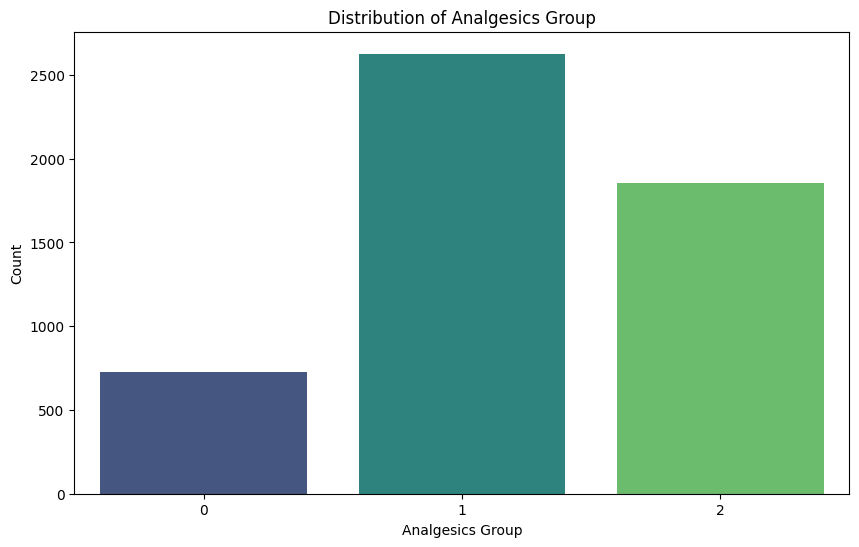

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Analgesics Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df_suva, x='Analgesics Group', palette='viridis')
plt.title('Distribution of Analgesics Group')
plt.xlabel('Analgesics Group')
plt.ylabel('Count')
plt.show()

<ipython-input-10-9a7ed94659e6>:14: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  substance_counts = substance_data.apply(pd.value_counts).fillna(0)


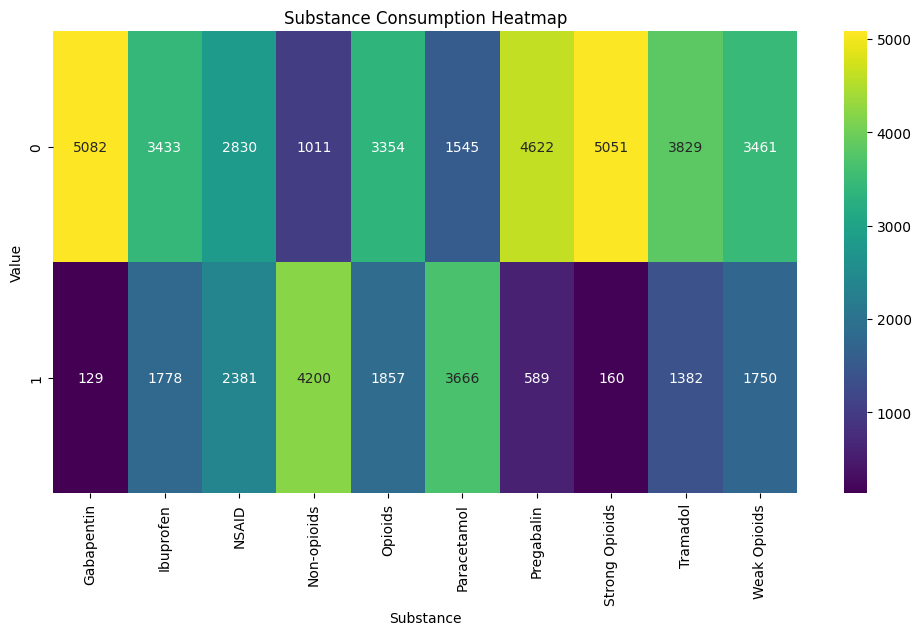

In [ ]:
# List of substances to include in the heatmap
substances = ['Gabapentin', 'Ibuprofen', 'NSAID', 'Non-opioids', 'Opioids', 'Paracetamol', 'Pregabalin', 'Strong Opioids', 'Tramadol', 'Weak Opioids']

# Create a new DataFrame with the specified substances, handling potential KeyError gracefully
substance_data = pd.DataFrame()
for substance in substances:
    try:
        substance_data[substance] = df_suva[substance]
    except KeyError:
        print(f"Warning: Column '{substance}' not found in the DataFrame. Creating an empty column.")
        substance_data[substance] = 0  # Or handle missing data differently (e.g., NaN)

# Count the occurrences of each substance
substance_counts = substance_data.apply(pd.value_counts).fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(substance_counts, annot=True, cmap='viridis', fmt='g')
plt.title('Substance Consumption Heatmap')
plt.xlabel('Substance')
plt.ylabel('Value')
plt.show()

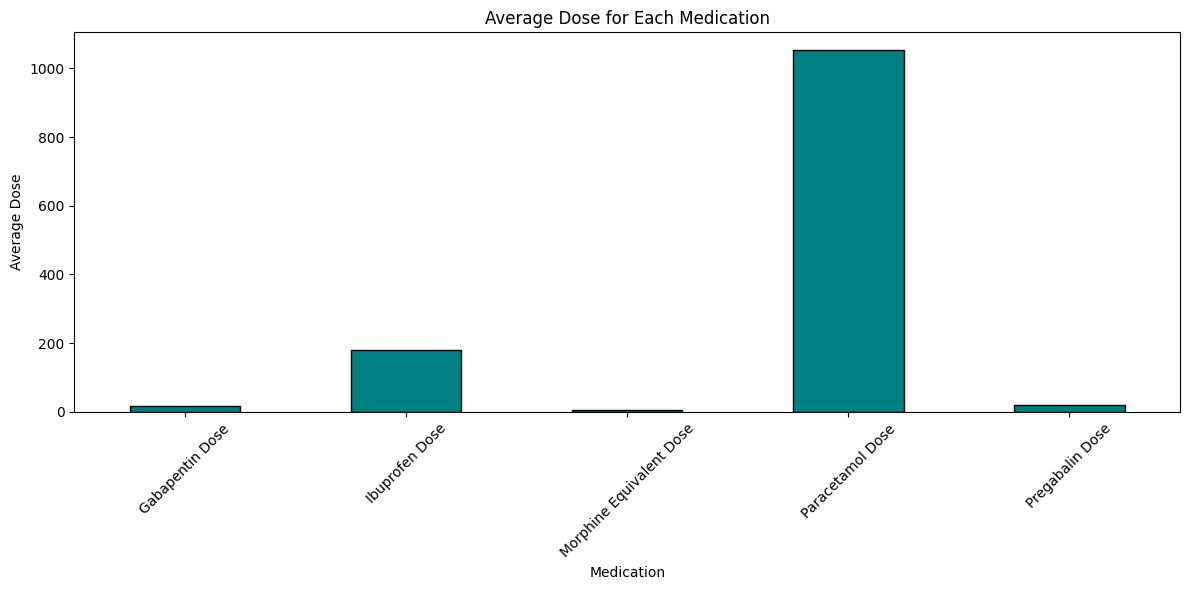

In [ ]:
import matplotlib.pyplot as plt

# Selecting all columns related to doses (assuming columns with "Dose" in their name)
dose_columns = [col for col in df_suva.columns if 'Dose' in col]

# Calculate the average dose for each medication
average_doses = df_suva[dose_columns].mean()

# Plotting the average doses in a bar chart
plt.figure(figsize=(12, 6))
average_doses.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Average Dose for Each Medication')
plt.xlabel('Medication')
plt.ylabel('Average Dose')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


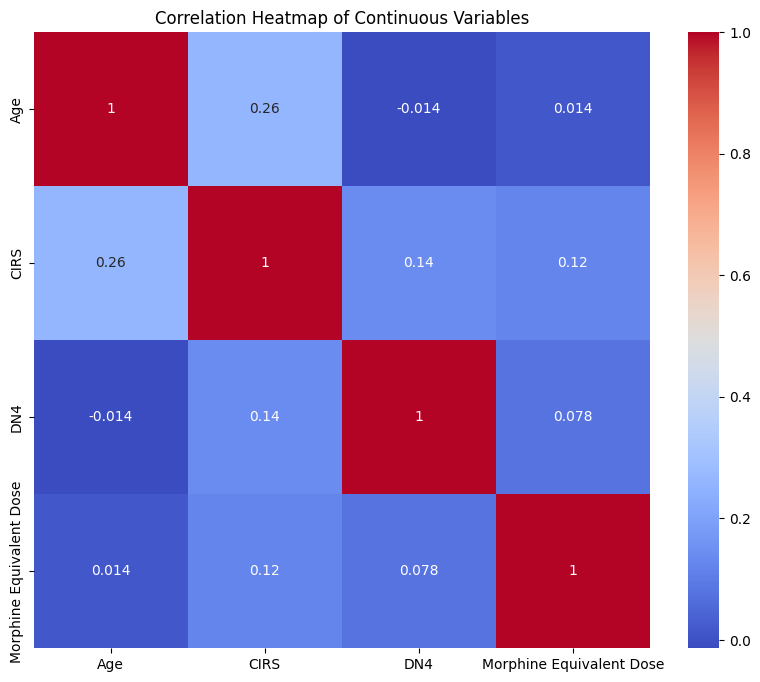

In [ ]:
# Selecting continuous variables for correlation heatmap
continuous_vars = ['Age', 'CIRS', 'DN4', 'Morphine Equivalent Dose']
correlation_matrix = df_suva[continuous_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()


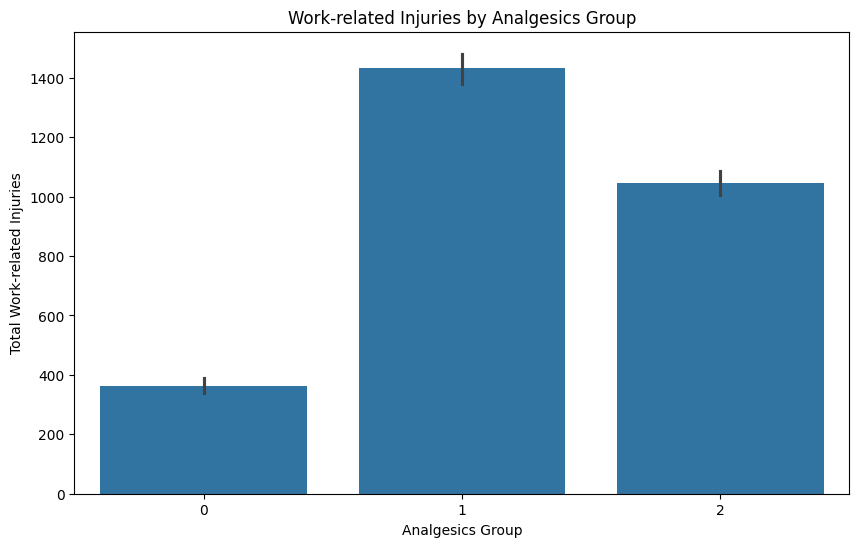

In [ ]:
# Bar plot for Work-related injury by Analgesics Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Analgesics Group', y='Work-related injury', data=df_suva, estimator=sum)
plt.title('Work-related Injuries by Analgesics Group')
plt.xlabel('Analgesics Group')
plt.ylabel('Total Work-related Injuries')
plt.show()

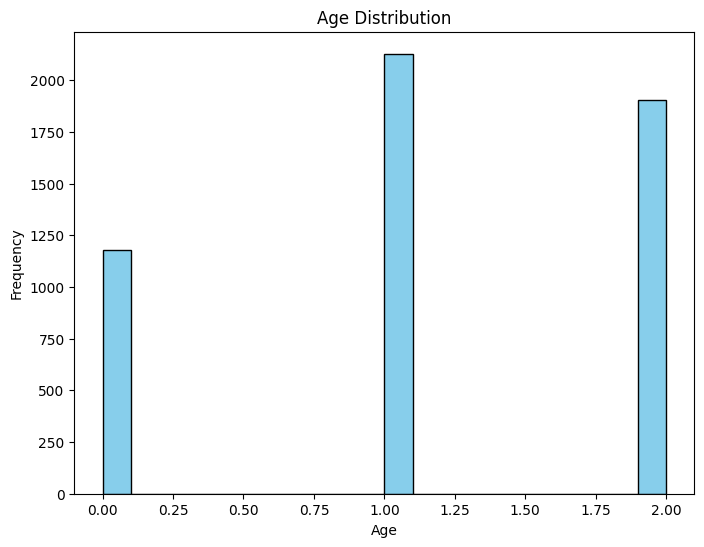

In [ ]:
import matplotlib.pyplot as plt

# Histogram for Age
plt.figure(figsize=(8, 6))
plt.hist(df_suva['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd

# List of medicament columns to calculate the mean
medicament_columns = [
    'Analgesics Group', 'Analgesics Group (at admission)', 'Analgesics Group (at discharge)',
    'Antidespressants', 'Antidespressants (at admission)', 'Antidespressants (at discharge)',
    'Antiepileptics', 'Antiepileptics (at admission)', 'Antiepileptics (at discharge)',
    'Gabapentin', 'Gabapentin (at admission)', 'Gabapentin (at discharge)', 'Gabapentin Dose',
    'Ibuprofen', 'Ibuprofen (at admission)', 'Ibuprofen (at discharge)', 'Ibuprofen Dose',
    'NSAID', 'NSAID (at admission)', 'NSAID (at discharge)',
    'Non-opioids', 'Non-opioids (at admission)', 'Non-opioids (at discharge)',
    'Opioids', 'Opioids (at admission)', 'Opioids (at discharge)',
    'Paracetamol', 'Paracetamol (at admission)', 'Paracetamol (at discharge)', 'Paracetamol Dose',
    'Pregabalin', 'Pregabalin (at admission)', 'Pregabalin (at discharge)', 'Pregabalin Dose',
    'Strong Opioids', 'Strong Opioids (at admission)', 'Strong Opioids (at discharge)',
    'Tramadol', 'Tramadol (at admission)', 'Tramadol (at discharge)',
    'Weak Opioids', 'Weak Opioids (at admission)', 'Weak Opioids (at discharge)'
]

# Calculate the mean for each medicament column for each age group
age_0_means = df_suva[df_suva['Age'] == 0][medicament_columns].mean()
age_1_means = df_suva[df_suva['Age'] == 1][medicament_columns].mean()
age_2_means = df_suva[df_suva['Age'] == 2][medicament_columns].mean()

# Create a DataFrame to display the results
mean_table = pd.DataFrame({
    'Medicament': medicament_columns,
    'Mean Age 0': age_0_means.values,
    'Mean Age 1': age_1_means.values,
    'Mean Age 2': age_2_means.values
})

# Display the table
print(mean_table)

                         Medicament  Mean Age 0   Mean Age 1   Mean Age 2
0                  Analgesics Group    1.197961     1.247650     1.193599
1   Analgesics Group (at admission)    0.752761     0.844455     0.839979
2   Analgesics Group (at discharge)    0.798641     0.903195     0.880902
3                  Antidespressants    0.033985     0.061560     0.054040
4   Antidespressants (at admission)    0.021240     0.044643     0.037251
5   Antidespressants (at discharge)    0.027188     0.052632     0.048793
6                    Antiepileptics    0.127443     0.143797     0.141133
7     Antiepileptics (at admission)    0.091759     0.093515     0.098111
8     Antiepileptics (at discharge)    0.110450     0.123120     0.121721
9                        Gabapentin    0.025489     0.024436     0.024659
10        Gabapentin (at admission)    0.014444     0.011278     0.012067
11        Gabapentin (at discharge)    0.018692     0.016447     0.018363
12                  Gabapentin Dose   

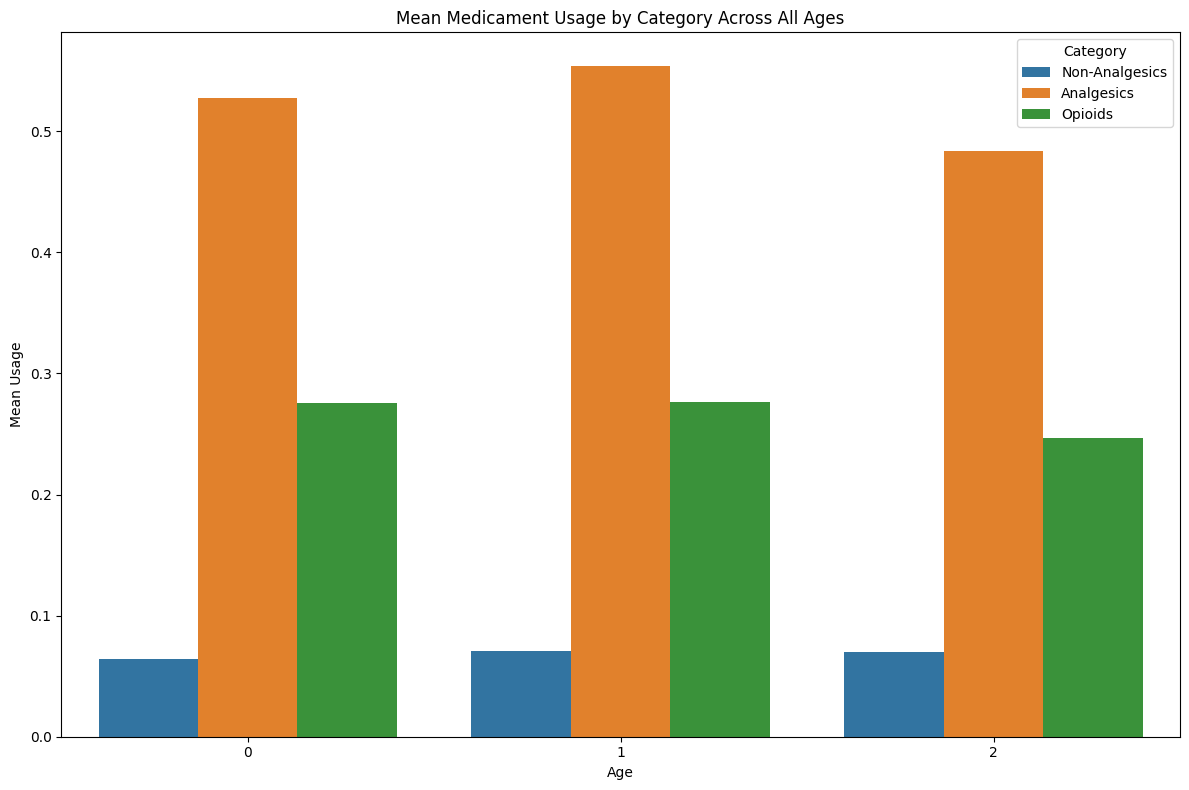

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define categories without "at admission" and "at discharge"
non_analgesics = ['Gabapentin', 'Pregabalin']
analgesics = ['Ibuprofen', 'Paracetamol']
opioids = ['Tramadol']

# Initialize a list to store the results
results = []

# Iterate over each age group
for age in df_suva['Age'].unique():
  # Filter the data for the current age
  age_data = df_suva[df_suva['Age'] == age]

  # Calculate the mean for each category
  non_analgesics_mean = age_data[non_analgesics].mean().mean()
  analgesics_mean = age_data[analgesics].mean().mean()
  opioids_mean = age_data[opioids].mean().mean()

  # Append the results to the list
  results.append({
      'Age': age,
      'Non-Analgesics': non_analgesics_mean,
      'Analgesics': analgesics_mean,
      'Opioids': opioids_mean
  })

# Convert the results to a DataFrame
category_means = pd.DataFrame(results)

# Melt the DataFrame for easier plotting
melted_data = category_means.melt(id_vars='Age', var_name='Category', value_name='Mean Usage')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_data, x='Age', y='Mean Usage', hue='Category')
plt.title('Mean Medicament Usage by Category Across All Ages')
plt.xlabel('Age')
plt.ylabel('Mean Usage')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## **Step 2: Clean the data**

### **Step 2.1 Hot encoding the variables which need to be specified**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Columns to hot encode
columns_to_encode = ['AIS', 'Analgesics Group (at admission)',
                     'Analgesics Group (at discharge)', 'Trauma location', 'Exclusion criteria']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Adjusted keyword to sparse_output

# Apply OneHotEncoder and create a DataFrame with encoded features
encoded_features = pd.DataFrame(
    encoder.fit_transform(df_suva[columns_to_encode]),
    columns=encoder.get_feature_names_out(columns_to_encode),
    index=df_suva.index
)


# Drop original columns and merge encoded features
df_suva_encoded = pd.concat([df_suva.drop(columns=columns_to_encode), encoded_features], axis=1)

# Display the first few rows of the resulting dataset
df_suva_encoded.head()


ID  Age  Analgesics Group  Antidespressants  \
0   1    1                 1                 1   
1   2    2                 1                 0   
2   3    2                 2                 0   
3   4    1                 1                 0   
4   5    1                 1                 0   

   Antidespressants (at admission)  Antidespressants (at discharge)  \
0                                1                                1   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Antiepileptics  Antiepileptics (at admission)  \
0               1                              1   
1               0                              0   
2               0                              0   
3               1                              1   
4               0                              0   

   Antiepileptics (at discharge)        BMI  ...  \
0                              1  24.092802  ...   
1                              0  27.889273  ...   
2                              0  27.582478  ...   
3                              1  28.487398  ...   
4                              0  28.393726  ...   

   Analgesics Group (at admission)_2  Analgesics Group (at discharge)_1  \
0                                0.0                                1.0   
1                                0.0                                1.0   
2                                1.0                                0.0   
3                                0.0                                1.0   
4                                0.0                                0.0   

   Analgesics Group (at discharge)_2  Trauma location_2  Trauma location_3  \
0                                0.0                0.0                0.0   
1                                0.0                0.0                0.0   
2                                1.0                0.0                0.0   
3                                0.0                0.0                1.0   
4                                0.0                0.0                1.0   

   Trauma location_4  Exclusion criteria_1  Exclusion criteria_2  \
0                0.0                   0.0                   0.0   
1                0.0                   0.0                   0.0   
2                0.0                   0.0                   0.0   
3                0.0                   0.0                   0.0   
4                0.0                   0.0                   0.0   

   Exclusion criteria_3  Exclusion criteria_4  
0                   0.0                   0.0  
1                   0.0                   0.0  
2                   0.0                   1.0  
3                   0.0                   0.0  
4                   0.0                   1.0  

[5 rows x 74 columns]

In [ ]:
df_suva_encoded.shape

(5211, 74)

### **Step 2.2: Overview of the missing values**

In [ ]:
missing_values = df_suva_encoded.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Missing values per column:\n", missing_columns)

Missing values per column:
 BMI                       43
BPI-Interference          82
BPI-Severity              83
CIRS                      73
DN4                      147
Duration before hosp.    646
Education                 17
Full time work            26
HADS-Anxiety             421
HADS-Depression          417
PCS                      358
Partnership               28
Surgery                   63
TSK                      360
Work-related injury       78
dtype: int64


### **Step 2.3: Imputation**

In [ ]:
pip install MissForest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from missforest import MissForest

# Split dataset into train and test sets.
train, test = train_test_split(df_suva_encoded, test_size=.3, shuffle=True, random_state=42)

# Initialize and fit MissForest, no need to specify categorical features
mf = MissForest()
mf.fit(x=train)

# Impute missing values in train and test sets
train_imputed = mf.transform(x=train)
test_imputed = mf.transform(x=test)

# Convert imputed data back to DataFrames
train_imputed_df = pd.DataFrame(train_imputed, columns=train.columns, index=train.index)
test_imputed_df = pd.DataFrame(test_imputed, columns=test.columns, index=test.index)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 5/5 [01:39<00:00, 19.94s/it]
/usr/local/lib/python3.10/dist-packages/missforest/missforest.py:484: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.10/dist-packages/missforest/missforest.py:488: UserWarning: In v

**Frome here on we only use "train_imputed_df"!**

#### **Step 2.3.1: Post refinement of Imputation**


In [ ]:
# Check for NaN values in the imputed training dataset
missing_values = train_imputed_df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

if len(missing_columns) == 0:
    print("The dataset has 0 missing values!")
else:
    print("Missing values per column:\n", missing_columns)

The dataset has 0 missing values!


In [ ]:
train_imputed_df

ID  Age  Analgesics Group  Antidespressants  \
325    326    0                 2                 0   
1051  1052    1                 1                 1   
3207  3208    2                 1                 0   
4475  4476    2                 0                 0   
3674  3675    0                 0                 0   
...    ...  ...               ...               ...   
466    467    1                 1                 1   
3092  3093    2                 1                 0   
3772  3773    0                 1                 0   
5191  5192    2                 1                 0   
860    861    2                 0                 0   

      Antidespressants (at admission)  Antidespressants (at discharge)  \
325                                 0                                0   
1051                                1                                0   
3207                                0                                0   
4475                                0                                0   
3674                                0                                0   
...                               ...                              ...   
466                                 0                                0   
3092                                0                                0   
3772                                0                                0   
5191                                0                                0   
860                                 0                                0   

      Antiepileptics  Antiepileptics (at admission)  \
325                0                              0   
1051               1                              1   
3207               0                              0   
4475               0                              0   
3674               0                              0   
...              ...                            ...   
466                0                              0   
3092               0                              0   
3772               0                              0   
5191               0                              0   
860                0                              0   

      Antiepileptics (at discharge)        BMI  ...  \
325                               0  24.696539  ...   
1051                              1  27.711720  ...   
3207                              0  28.465389  ...   
4475                              0  34.043209  ...   
3674                              0  27.900518  ...   
...                             ...        ...  ...   
466                               0  31.804081  ...   
3092                              0  27.055891  ...   
3772                              0  26.417120  ...   
5191                              0  25.829039  ...   
860                               0  35.931583  ...   

      Analgesics Group (at admission)_2  Analgesics Group (at discharge)_1  \
325                                 0.0                                1.0   
1051                                0.0                                1.0   
3207                                0.0                                1.0   
4475                                0.0                                0.0   
3674                                0.0                                0.0   
...                                 ...                                ...   
466                                 0.0                                0.0   
3092                                0.0                                1.0   
3772                                0.0                                0.0   
5191                                0.0                                0.0   
860                                 0.0                                0.0   

      Analgesics Group (at discharge)_2  Trauma location_2  Trauma location_3  \
325                                 0.0                0.0                1.0   
1051                                0

Now, after the imputation, we check if there are any values between 0 and 1, which habe been wrongly imputed.

In [ ]:
# Find the locations of values greater than 0 and less than 1
locations = (train_imputed_df > 0) & (train_imputed_df < 1)

# Count the rows with at least one value between 0 and 1
row_count = locations.any(axis=1).sum()

# Display the count
print(f"Number of rows with at least one value between 0 and 1: {row_count}")

Number of rows with at least one value between 0 and 1: 492


In [ ]:
# Find the locations of values greater than 0 and less than 1
locations = (train_imputed_df > 0) & (train_imputed_df < 1)

# Count the number of values between 0 and 1 for each column
column_counts = locations.sum(axis=0)

# Filter columns that have at least one value between 0 and 1
columns_with_values = column_counts[column_counts > 0]

# Display the counts for each relevant column
if not columns_with_values.empty:
    print("Columns with at least one value between 0 and 1:")
    print(columns_with_values)
else:
    print("No columns have values between 0 and 1.")

Columns with at least one value between 0 and 1:
BMI                           3
BPI-Interference            112
BPI-Severity                 62
DN4                          95
Duration before hosp.         1
Education                    13
Full time work               16
Morphine Equivalent Dose    176
Partnership                  19
Pregabalin Dose               1
Surgery                      44
Work-related injury          48
dtype: int64


After reviewing the dataset, we will now correct the columns where the values should be either 0 or 1 (and not in decimal form). For the BMI column, we have decided to set all values between 0 and 1 to 0, as the minimum value greater than 0 is 15.

In [ ]:
import pandas as pd

# List of columns to modify
columns_to_modify = ['BMI', 'DN4', 'Education', 'Full time work', 'Partnership', 'Surgery', 'Work-related injury']

# Apply the transformation to the specified columns
for column in columns_to_modify:
    if column == 'BMI':
        # For BMI, set everything below 1 to 0
        train_imputed_df[column] = train_imputed_df[column].apply(
            lambda x: 0 if x < 1 else x
        )
    else:
        train_imputed_df[column] = train_imputed_df[column].apply(
            lambda x: 0 if 0 < x < 0.5 else (1 if 0.5 <= x < 1 else x)
        )

# Display the modified DataFrame (optional)
print(train_imputed_df[columns_to_modify])

            BMI  DN4  Education  Full time work  Partnership  Surgery  \
325   24.696539  0.0        1.0             0.0          0.0      1.0   
1051  27.711720  1.0        0.0             1.0          1.0      1.0   
3207  28.465389  0.0        0.0             0.0          1.0      0.0   
4475  34.043209  1.0        0.0             1.0          1.0      1.0   
3674  27.900518  0.0        1.0             1.0          1.0      1.0   
...         ...  ...        ...             ...          ...      ...   
466   31.804081  1.0        1.0             1.0          1.0      1.0   
3092  27.055891  0.0        0.0             1.0          1.0      0.0   
3772  26.417120  1.0        0.0             1.0          1.0      1.0   
5191  25.829039  0.0        0.0             1.0          1.0      1.0   
860   35.931583  0.0        0.0             1.0          1.0      1.0   

      Work-related injury  
325                   1.0  
1051                  1.0  
3207                  0.0  
4475       

In [ ]:
# Find the locations of values greater than 0 and less than 1
locations = (train_imputed_df > 0) & (train_imputed_df < 1)

# Count the number of values between 0 and 1 for each column
column_counts = locations.sum(axis=0)

# Filter columns that have at least one value between 0 and 1
columns_with_values = column_counts[column_counts > 0]

# Display the counts for each relevant column
if not columns_with_values.empty:
    print("Columns with at least one value between 0 and 1:")
    print(columns_with_values)
else:
    print("No columns have values between 0 and 1.")

Columns with at least one value between 0 and 1:
BPI-Interference            112
BPI-Severity                 62
Duration before hosp.         1
Morphine Equivalent Dose    176
Pregabalin Dose               1
dtype: int64


In [ ]:
train_imputed_df.shape

(3647, 74)

## **Step 3: Feature Selection**

In [ ]:
pip install PyImpetus

### **Step 3.1: Markov blanket for the training set**

In [ ]:

# Define the target variable
target_variable = "Analgesics Group"

# Separate features and target variable
X_train = train_imputed_df.drop(target_variable, axis=1).reset_index(drop=True)
y_train = train_imputed_df[target_variable].reset_index(drop=True)# Define the target variable
target_variable = "Analgesics Group"

# Separate features and target variable for the test set
X_test = test_imputed_df.drop(target_variable, axis=1).reset_index(drop=True)
y_test = test_imputed_df[target_variable].reset_index(drop=True)

Progress bar: 100%|██████████| 5/5 [2:21:11<00:00, 1694.22s/it]


Selected Features (Markov Blanket): ['Ibuprofen Dose', 'Opioids', 'Opioids (at admission)', 'Opioids (at discharge)', 'Paracetamol Dose', 'Tramadol', 'Tramadol (at admission)', 'Weak Opioids', 'Weak Opioids (at admission)', 'Weak Opioids (at discharge)', 'Analgesics Group (at admission)_2', 'Analgesics Group (at discharge)_2', 'Tramadol (at discharge)', 'HADS-Depression', 'BPI-Interference', 'Strong Opioids', 'BPI-Severity', 'Strong Opioids (at admission)', 'Morphine Equivalent Dose', 'Paracetamol (at discharge)', 'Strong Opioids (at discharge)', 'Duration before hosp.', 'Antiepileptics (at admission)', 'ID', 'HADS-Anxiety', 'Gabapentin Dose', 'Non-opioids', 'Pregabalin (at admission)', 'Pregabalin (at discharge)', 'Antiepileptics (at discharge)', 'Gabapentin (at discharge)', 'Analgesics Group (at discharge)_1', 'Pregabalin']
Feature Importance Scores: [20.79441541679836, 20.79441541679836, 20.79441541679836, 20.79441541679836, 20.79441541679836, 20.79441541679836, 20.79441541679836, 2

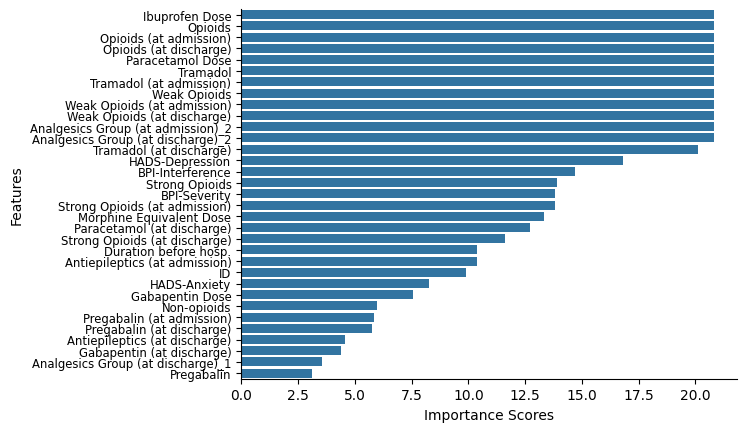

In [ ]:
from PyImpetus import PPIMBC
from sklearn.svm import SVC

# Initialize the PyImpetus object for classification
model = PPIMBC(
    model=SVC(random_state=27, class_weight="balanced"),  # Classification model
    p_val_thresh=0.05,  # P-value threshold for feature selection
    num_simul=30,  # Number of train-test splits
    simul_size=0.2,  # Size of the test set in each split
    simul_type=0,  # No stratification for train-test splits
    sig_test_type="non-parametric",  # Use non-parametric significance test
    cv=5,  # Number of cross-validation splits
    random_state=27,  # Random state for reproducibility
    n_jobs=-1,  # Use all available processors
    verbose=2  # Verbosity level
)

# Fit and transform the training data
df_train = model.fit_transform(X_train, y_train)

# Check out the Markov Blanket (MB) - the selected features
print("Selected Features (Markov Blanket):", model.MB)

# Check out the feature importance scores for the selected features
print("Feature Importance Scores:", model.feat_imp_scores)

# Plot the feature importance scores
model.feature_importance()

In [ ]:
import pandas as pd

# Extract the feature importance scores and selected features
selected_features = model.MB  # Markov Blanket (selected features)
feature_importance_scores = model.feat_imp_scores  # Feature importance scores

# Create a DataFrame to store the feature rankings
feature_ranking_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance Score": feature_importance_scores
})

# Sort the DataFrame by importance scores in descending order
feature_ranking_df = feature_ranking_df.sort_values(by="Importance Score", ascending=False).reset_index(drop=True)

# Display the DataFrame
print(feature_ranking_df)

                              Feature  Importance Score
0                      Ibuprofen Dose         20.794415
1                             Opioids         20.794415
2              Opioids (at admission)         20.794415
3              Opioids (at discharge)         20.794415
4                    Paracetamol Dose         20.794415
5                            Tramadol         20.794415
6             Tramadol (at admission)         20.794415
7                        Weak Opioids         20.794415
8         Weak Opioids (at admission)         20.794415
9         Weak Opioids (at discharge)         20.794415
10  Analgesics Group (at admission)_2         20.794415
11  Analgesics Group (at discharge)_2         20.794415
12            Tramadol (at discharge)         20.101268
13                    HADS-Depression         16.787082
14                   BPI-Interference         14.691857
15                     Strong Opioids         13.906874
16                       BPI-Severity         13

Let's create a df which is the same as the Markov Blanket in order to not run it every time.

In [ ]:
import pandas as pd

# Backup data for mMarkov blanket
data = {
    "Selected Feature": [
        "Ibuprofen Dose", "Opioids", "Opioids (at admission)", "Opioids (at discharge)",
        "Paracetamol Dose", "Tramadol", "Tramadol (at admission)", "Tramadol (at discharge)",
        "Weak Opioids", "Weak Opioids (at admission)", "Weak Opioids (at discharge)",
        "Analgesics Group (at admission)_2", "Analgesics Group (at discharge)_2", "ID",
        "BPI-Interference", "Strong Opioids", "Strong Opioids (at admission)",
        "Strong Opioids (at discharge)", "Antiepileptics", "Morphine Equivalent Dose",
        "Antiepileptics (at discharge)", "Antiepileptics (at admission)", "BPI-Severity",
        "HADS-Depression", "Paracetamol (at discharge)", "Pregabalin (at discharge)",
        "Pregabalin", "Non-opioids", "Analgesics Group (at discharge)_1", "HADS-Anxiety",
        "Pregabalin Dose", "Pregabalin (at admission)", "TSK"
    ],
    "Importance Score": [
        20.794415, 20.794415, 20.794415, 20.794415, 20.794415, 20.794415, 20.794415,
        20.794415, 20.794415, 20.794415, 20.794415, 20.794415, 20.794415, 16.317079,
        13.987586, 11.436571, 11.344980, 11.165939, 9.585803, 9.479063, 8.472228,
        8.006538, 7.738074, 7.059398, 6.660860, 6.206691, 6.133435, 5.988945, 5.639195,
        5.370767, 4.801720, 4.447733, 3.545855
    ]
}

# Create DataFrame
df_mb_backup = pd.DataFrame(data)

# Display DataFrame
print(df_mb_backup)

                     Selected Feature  Importance Score
0                      Ibuprofen Dose         20.794415
1                             Opioids         20.794415
2              Opioids (at admission)         20.794415
3              Opioids (at discharge)         20.794415
4                    Paracetamol Dose         20.794415
5                            Tramadol         20.794415
6             Tramadol (at admission)         20.794415
7             Tramadol (at discharge)         20.794415
8                        Weak Opioids         20.794415
9         Weak Opioids (at admission)         20.794415
10        Weak Opioids (at discharge)         20.794415
11  Analgesics Group (at admission)_2         20.794415
12  Analgesics Group (at discharge)_2         20.794415
13                                 ID         16.317079
14                   BPI-Interference         13.987586
15                     Strong Opioids         11.436571
16      Strong Opioids (at admission)         11

## **Step 4: Models**

Based on the Marcov Blanked we got the following features

In [ ]:
# selected_features = model.MB --> Dynamically update the selected features based on the Markov Blanket

# Markov blanket selected features
selected_features = [
    "Ibuprofen Dose", "Opioids", "Opioids (at admission)", "Opioids (at discharge)",
    "Paracetamol Dose", "Tramadol", "Tramadol (at admission)", "Tramadol (at discharge)",
    "Weak Opioids", "Weak Opioids (at admission)", "Weak Opioids (at discharge)",
    "Analgesics Group (at admission)_2", "Analgesics Group (at discharge)_2", "ID",
    "BPI-Interference", "Strong Opioids", "Strong Opioids (at admission)",
    "Strong Opioids (at discharge)", "Antiepileptics", "Morphine Equivalent Dose",
    "Antiepileptics (at discharge)", "Antiepileptics (at admission)", "BPI-Severity",
    "HADS-Depression", "Paracetamol (at discharge)", "Pregabalin (at discharge)",
    "Pregabalin", "Non-opioids", "Analgesics Group (at discharge)_1", "HADS-Anxiety",
    "Pregabalin Dose", "Pregabalin (at admission)", "TSK"
    ]


# Filter datasets with Markov blanket features
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Step 4.1: Random Forrest**

In [ ]:
print("\nRandom Forest Classifier")
rf_model = RandomForestClassifier(random_state=27, class_weight='balanced')
rf_model.fit(X_train_filtered, y_train)
rf_predictions = cross_val_predict(rf_model, X_train_filtered, y_train, cv=5)
print("Accuracy:", accuracy_score(y_train, rf_predictions))
print("Classification Report:\n", classification_report(y_train, rf_predictions))


Random Forest Classifier
Accuracy: 0.9994516040581299
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00      1848
           2       1.00      1.00      1.00      1295

    accuracy                           1.00      3647
   macro avg       1.00      1.00      1.00      3647
weighted avg       1.00      1.00      1.00      3647



### **Step 4.2: KNN**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_predictions = cross_val_predict(knn_model, X_train_filtered, y_train, cv=5)
print("KNN Accuracy:", accuracy_score(y_train, knn_predictions))
print("Classification Report:\n", classification_report(y_train, knn_predictions))

KNN Accuracy: 0.5887030435974774
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.95      0.71       504
           1       0.64      0.64      0.64      1848
           2       0.52      0.37      0.43      1295

    accuracy                           0.59      3647
   macro avg       0.57      0.65      0.59      3647
weighted avg       0.58      0.59      0.57      3647



### **Step 4.3: SVM**

In [ ]:
print("\nSupport Vector Machine Classifier")
svm_model = SVC(random_state=27, class_weight='balanced')
svm_predictions = cross_val_predict(svm_model, X_train_filtered, y_train, cv=5)
print("Accuracy:", accuracy_score(y_train, svm_predictions))
print("Classification Report:\n", classification_report(y_train, svm_predictions))


Support Vector Machine Classifier
Accuracy: 0.4825884288456265
Classification Report:
               precision    recall  f1-score   support

           0       0.37      1.00      0.54       504
           1       0.66      0.29      0.40      1848
           2       0.49      0.56      0.52      1295

    accuracy                           0.48      3647
   macro avg       0.51      0.62      0.49      3647
weighted avg       0.56      0.48      0.46      3647



### **Step 4.4: Models Conclusion & Summary Table**

 Confusion Matrix for overview

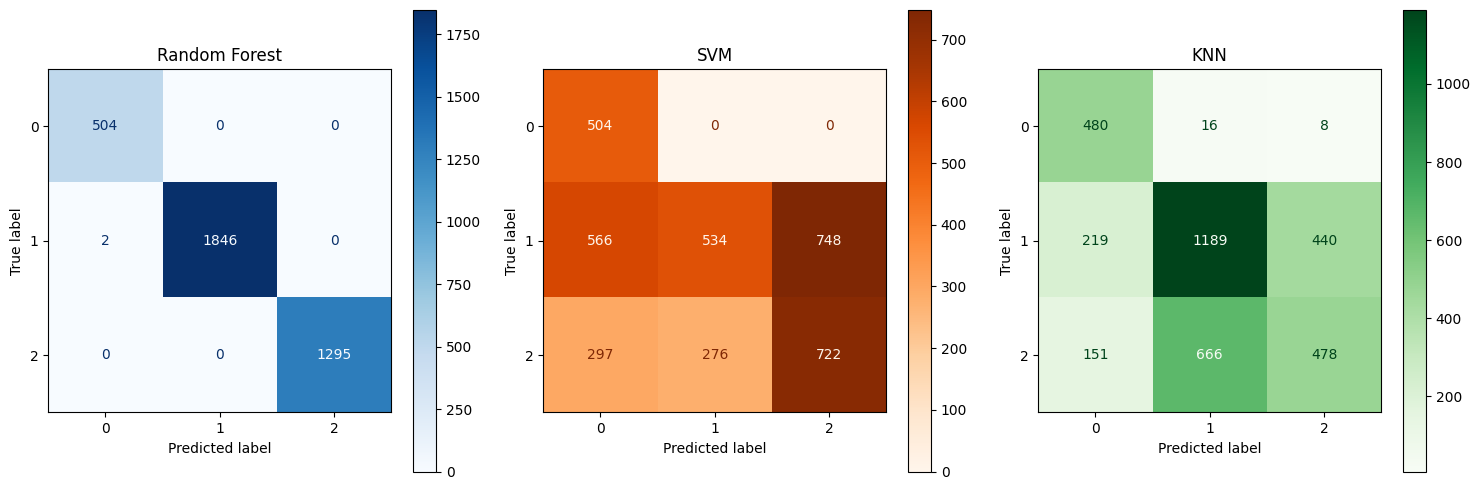

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrices for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, rf_predictions, ax=axes[0], cmap='Blues')
axes[0].set_title("Random Forest")

# KNN Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, knn_predictions, ax=axes[2], cmap='Greens')
axes[2].set_title("KNN")

# SVM Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, svm_predictions, ax=axes[1], cmap='Oranges')
axes[1].set_title("SVM")

plt.tight_layout()
plt.show()

Summary Table

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collect metrics
metrics = {
    'Model': ['Random Forest', 'KNN', 'SVM'],
    'Accuracy': [
        accuracy_score(y_train, rf_predictions),
        accuracy_score(y_train, knn_predictions),
        accuracy_score(y_train, svm_predictions)
    ],
    'Precision': [
        precision_score(y_train, rf_predictions, average='weighted'),
        precision_score(y_train, knn_predictions, average='weighted'),
        precision_score(y_train, svm_predictions, average='weighted')
    ],
    'Recall': [
        recall_score(y_train, rf_predictions, average='weighted'),
        recall_score(y_train, knn_predictions, average='weighted'),
        recall_score(y_train, svm_predictions, average='weighted')
    ],
    'F1-Score': [
        f1_score(y_train, rf_predictions, average='weighted'),
        f1_score(y_train, knn_predictions, average='weighted'),
        f1_score(y_train, svm_predictions, average='weighted')
    ]
}

# Create DataFrame
results_df = pd.DataFrame(metrics)

# Print the table in a formatted way
print("\nModel Performance Summary:")
print(results_df.to_string(index=False))


Model Performance Summary:
        Model  Accuracy  Precision   Recall  F1-Score
Random Forest  0.999452   0.999454 0.999452  0.999452
          KNN  0.588703   0.583349 0.588703  0.574830
          SVM  0.482588   0.559413 0.482588  0.463496


## Step 4.5: Deep dive into Random Forest

Feature Importance: We want to understand which features contribute most to predictions. The Precsision of the initial model is very high which can either indicate it is perfect or something is off.

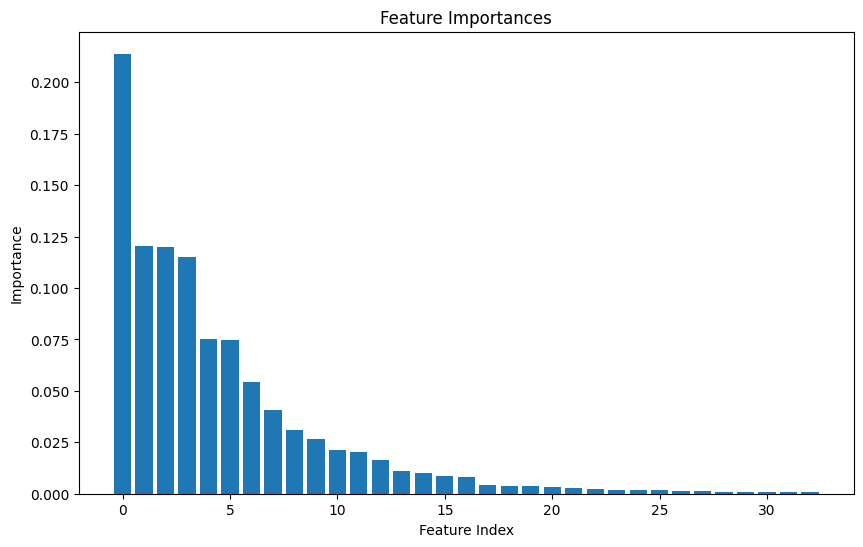

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


Confusion Matrix  

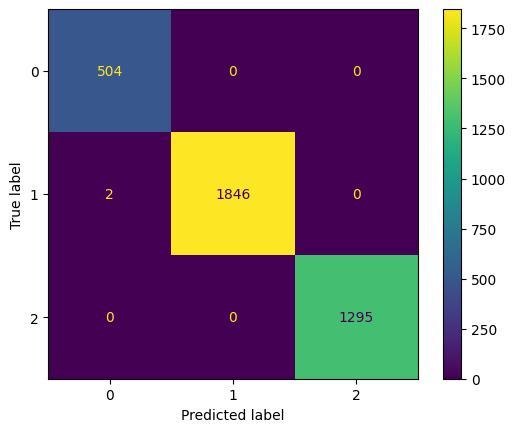

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='viridis')
plt.show()


Let's dive into hyperparameter tuning:

Random Forest models can be fine-tuned by optimizing key hyperparameters using techniques like RandomizedSearchCV. Important parameters include:

n_estimators: Number of trees in the forest. More trees increase accuracy but require more resources.
max_depth: Controls the depth of each tree to avoid overfitting.
min_samples_split: Minimum samples needed to split a node, affecting tree complexity.
min_samples_leaf: Minimum samples in a leaf node, ensuring meaningful splits.
max_features: Number of features considered at each split, balancing diversity and accuracy. We now try to find out how these parameters influence the model to further optimze it

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Randomized Search
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                               n_iter=50, cv=5, verbose=2, random_state=27, n_jobs=-1)
rf_random.fit(X_train_filtered, y_train)

# Best parameters
print("Best Parameters:", rf_random.best_params_)

# Update model with best parameters
rf_model_tuned = rf_random.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


Updated Random Forrest Model based on the Randomized Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Update the model with the best parameters
rf_model_tuned = RandomForestClassifier(
    n_estimators=400,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    random_state=27,
    class_weight='balanced'  # Keep this if handling class imbalance
)

# Fit the model on the training data
rf_model_tuned.fit(X_train_filtered, y_train)


RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=400, random_state=27)

Now we want to validate the model using cross validation

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

rf_predictions_cv = cross_val_predict(rf_model_tuned, X_train_filtered, y_train, cv=5)
print("Cross-Validation Accuracy:", accuracy_score(y_train, rf_predictions_cv))
print("Classification Report:\n", classification_report(y_train, rf_predictions_cv))


Cross-Validation Accuracy: 0.999725802029065
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00      1848
           2       1.00      1.00      1.00      1295

    accuracy                           1.00      3647
   macro avg       1.00      1.00      1.00      3647
weighted avg       1.00      1.00      1.00      3647



Again check the feature importance

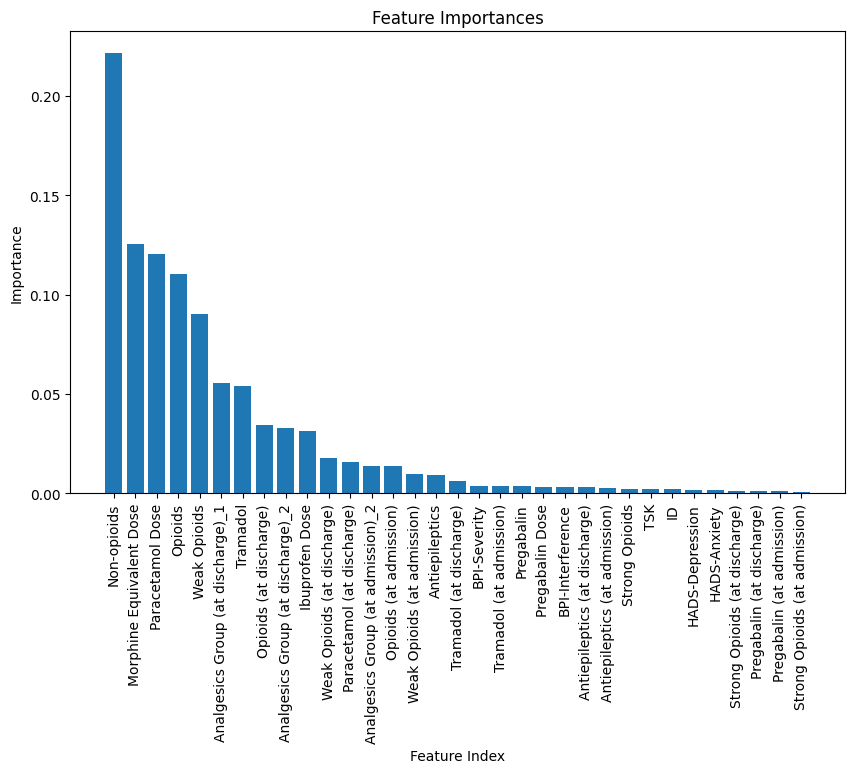

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = rf_model_tuned.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = X_train_filtered.columns

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


Evaluate on Test Set

Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       778
           2       1.00      1.00      1.00       562

    accuracy                           1.00      1564
   macro avg       1.00      1.00      1.00      1564
weighted avg       1.00      1.00      1.00      1564



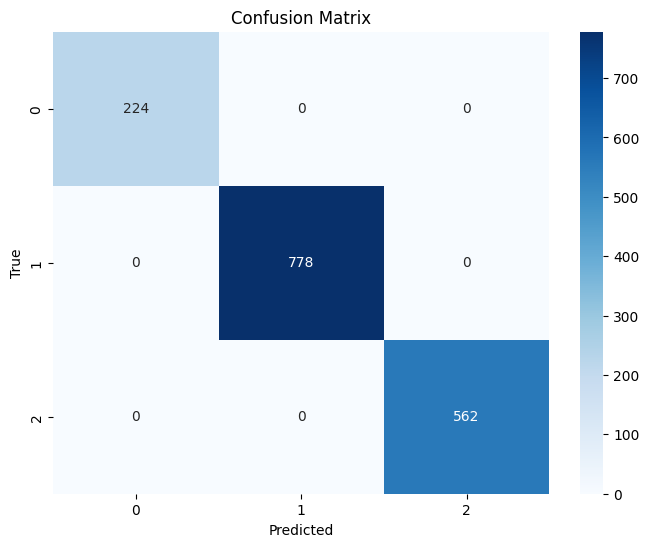

In [ ]:
# Predict on the filtered test set
y_test_predictions = rf_model_tuned.predict(X_test_filtered)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_test_predictions))
print("Classification Report:\n", classification_report(y_test, y_test_predictions))

# Optional: Confusion matrix visualization
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model_tuned.classes_, yticklabels=rf_model_tuned.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Model Performance

ROC

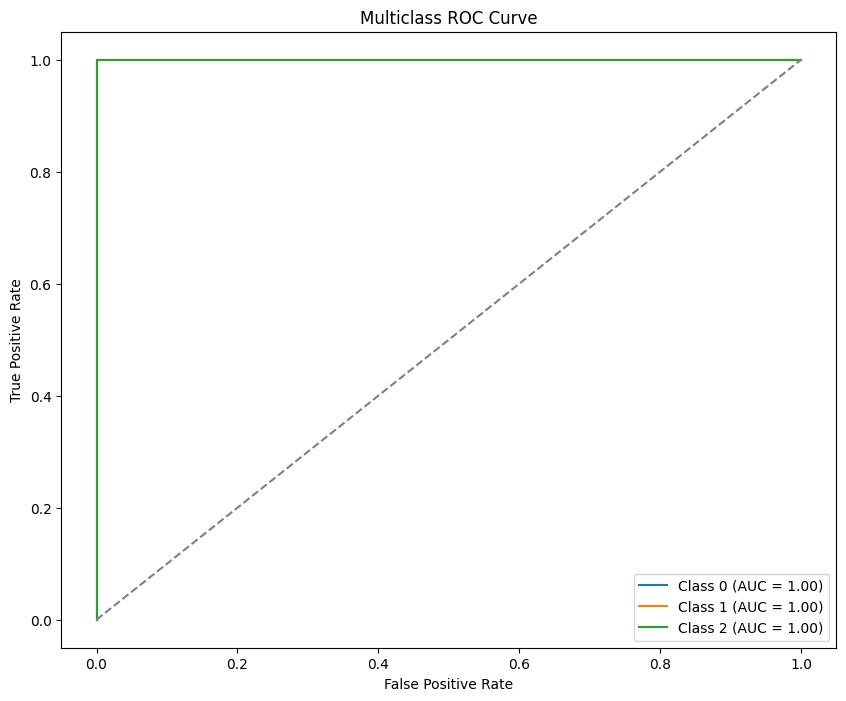

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multiclass ROC curve
classes = rf_model_tuned.classes_
y_test_binarized = label_binarize(y_test, classes=classes)

# Get predicted probabilities
y_scores = rf_model_tuned.predict_proba(X_test_filtered)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc_score:.2f})")

# Add plot details
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.show()


SHAP Values

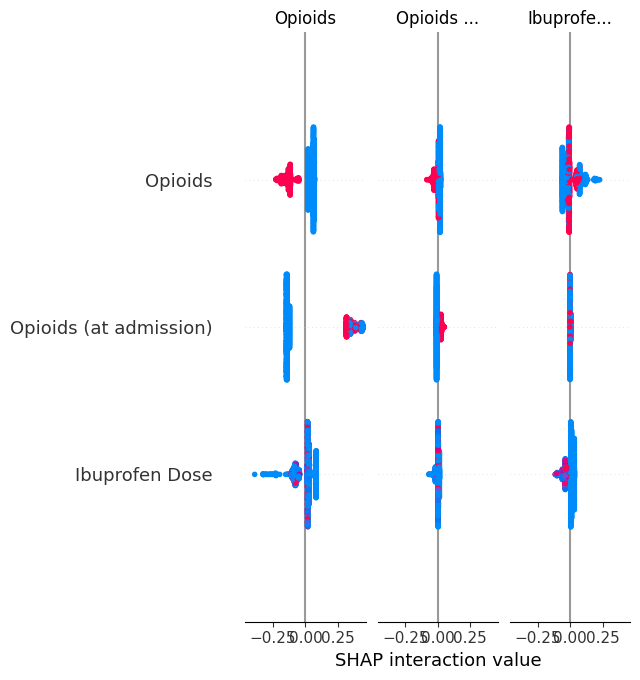

In [ ]:
import shap

explainer = shap.TreeExplainer(rf_model_tuned)
shap_values = explainer.shap_values(X_test_filtered)

shap.summary_plot(shap_values, X_test_filtered)


## **Step 5: Casual Discovery**


For causality, it is essential to use the entire dataset, not just the subset provided by the Markov blanket. This is why we rely on the imputed dataset and not the one coming from the Markov Blanket, which already select the best features. Imputation does not alter the data but makes it more complete.

In this part we will use the following dataset: *train_imputed_df*

In [ ]:
!pip install causal-learn
!pip install dowhy
!pip install graphviz
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.9 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


        ID  Age  Analgesics Group  Antidespressants  \
325    326    0                 2                 0   
1051  1052    1                 1                 1   
3207  3208    2                 1                 0   
4475  4476    2                 0                 0   
3674  3675    0                 0                 0   

      Antidespressants (at admission)  Antidespressants (at discharge)  \
325                                 0                                0   
1051                                1                                0   
3207                                0                                0   
4475                                0                                0   
3674                                0                                0   

      Antiepileptics  Antiepileptics (at admission)  \
325                0                              0   
1051               1                              1   
3207               0                              0   
4475

  0%|          | 0/70 [00:00<?, ?it/s]

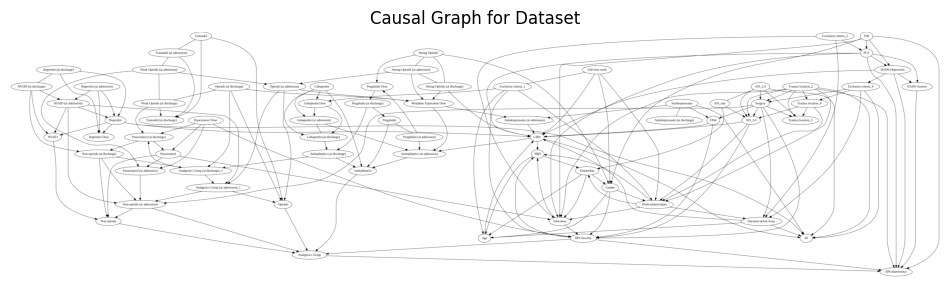

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import matplotlib.image as mpimg
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from dowhy import CausalModel

# Load the dataset
df_train = train_imputed_df.copy()

# Display the DataFrame
print(df_train.head())

# Preprocessing to handle singular matrix issues
# 1. Remove constant features (zero variance)
df_train = df_train.loc[:, df_train.nunique() > 1]

# 2. Remove duplicate features
df_train = df_train.T.drop_duplicates().T

# 3. Check for multicollinearity and drop highly correlated features
correlation_matrix = df_train.corr()
high_corr_features = set()
threshold = 0.95  # Correlation threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)
df_train = df_train.drop(columns=high_corr_features)

# Convert the DataFrame to a NumPy array for causal discovery
data_array = df_train.select_dtypes(include=[np.number]).to_numpy()

# Generate labels for the features
labels = df_train.select_dtypes(include=[np.number]).columns.tolist()

# Perform causal discovery using the PC algorithm
cg = pc(data_array, alpha=0.05, indep_test='fisherz')

# Visualize the causal graph
pyd = GraphUtils.to_pydot(cg.G, labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')

plt.figure(figsize=(12, 8))
plt.axis('off')
plt.title("Causal Graph for Dataset")
plt.imshow(img)
plt.show()



  0%|          | 0/29 [00:00<?, ?it/s]

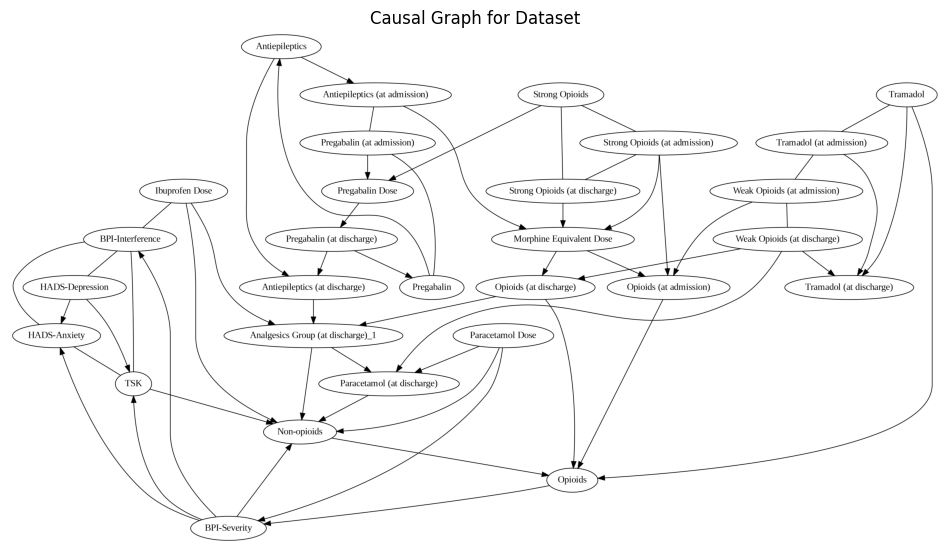

In [ ]:
# Define the selected features
selected_features = [
    "Ibuprofen Dose", "Opioids", "Opioids (at admission)", "Opioids (at discharge)",
    "Paracetamol Dose", "Tramadol", "Tramadol (at admission)", "Tramadol (at discharge)",
    "Weak Opioids", "Weak Opioids (at admission)", "Weak Opioids (at discharge)",
    "Analgesics Group (at admission)_2", "Analgesics Group (at discharge)_2",
    "BPI-Interference", "Strong Opioids", "Strong Opioids (at admission)",
    "Strong Opioids (at discharge)", "Antiepileptics", "Morphine Equivalent Dose",
    "Antiepileptics (at discharge)", "Antiepileptics (at admission)", "BPI-Severity",
    "HADS-Depression", "Paracetamol (at discharge)", "Pregabalin (at discharge)",
    "Pregabalin", "Non-opioids", "Analgesics Group (at discharge)_1", "HADS-Anxiety",
    "Pregabalin Dose", "Pregabalin (at admission)", "TSK"
]

# Load and filter the dataset
df_train = train_imputed_df.copy()

# Keep only the selected features
df_train = df_train[selected_features]

# Step 1: Handle missing values
df_train = df_train.dropna()  # Drop rows with missing values

# Step 2: Remove constant features
df_train = df_train.loc[:, df_train.nunique() > 1]  # Keep only non-constant columns

# Step 3: Remove duplicate features
df_train = df_train.T.drop_duplicates().T

# Step 4: Handle multicollinearity by removing highly correlated features
correlation_matrix = df_train.corr()
threshold = 0.95  # Correlation threshold
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

df_train = df_train.drop(columns=high_corr_features)

# Step 5: Add small noise to avoid singular matrices (optional)
df_train += np.random.normal(0, 1e-6, df_train.shape)

# Step 6: Prepare data for causal discovery
data_array = df_train.select_dtypes(include=[np.number]).to_numpy()
labels = df_train.select_dtypes(include=[np.number]).columns.tolist()

# Step 7: Perform causal discovery using the PC algorithm
cg = pc(data_array, alpha=0.05, indep_test='fisherz')

# Step 8: Visualize the causal graph
pyd = GraphUtils.to_pydot(cg.G, labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')

plt.figure(figsize=(12, 8))
plt.axis('off')
plt.title("Causal Graph for Dataset")
plt.imshow(img)
plt.show()


We use the train_imputed set becasue it is imputated but not splitted yet.


Top 15 Features with Highest and 5 Features with Lowest Causal Effects:
                              Feature  Causal Effect
0                             Opioids       1.214286
1                        Weak Opioids       1.176277
2                            Tramadol       1.063687
3              Opioids (at discharge)       1.038923
4   Analgesics Group (at discharge)_2       1.038923
5         Weak Opioids (at discharge)       1.010616
6   Analgesics Group (at admission)_2       0.989948
7              Opioids (at admission)       0.989948
8         Weak Opioids (at admission)       0.961292
9             Tramadol (at discharge)       0.940711
10            Tramadol (at admission)       0.913335
11                        Non-opioids       0.908868
12                     Strong Opioids       0.807921
13      Strong Opioids (at admission)       0.803376
14      Strong Opioids (at discharge)       0.801122
15  Analgesics Group (at discharge)_1      -0.072628
16                     Ful

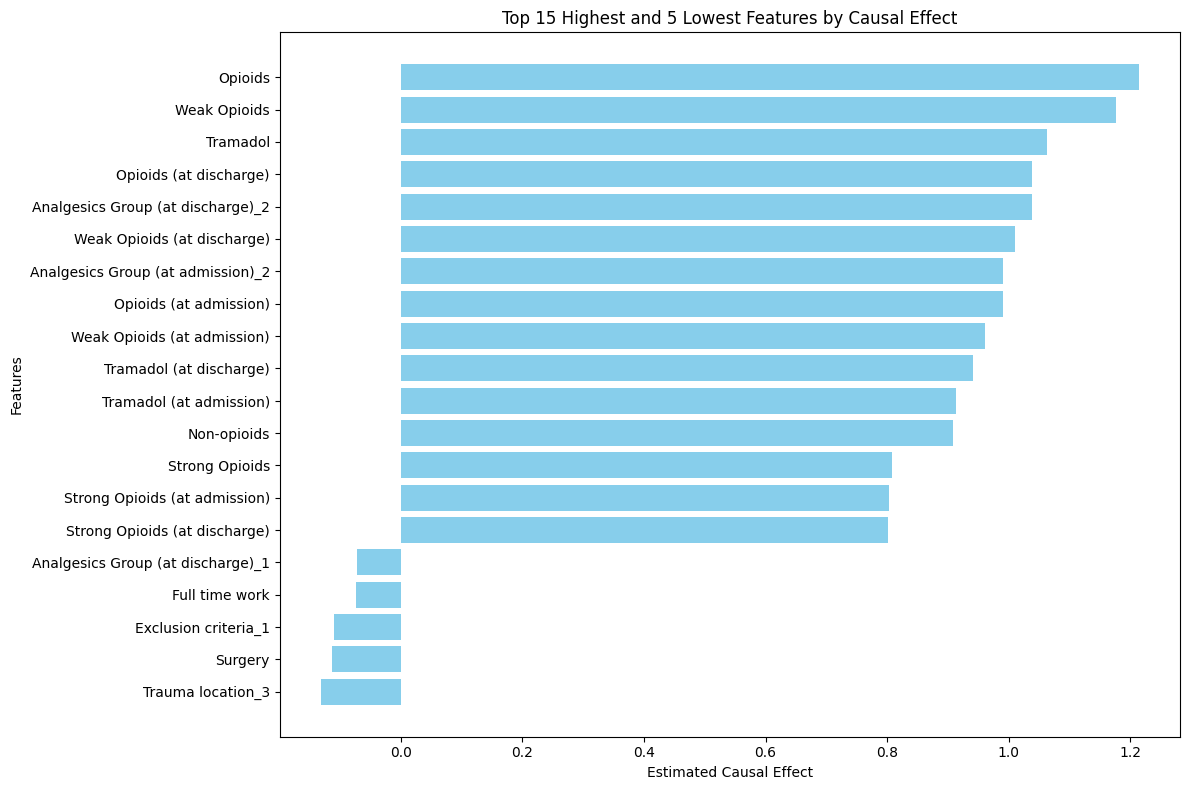

In [ ]:
import pandas as pd
import numpy as np
from dowhy import CausalModel
import matplotlib.pyplot as plt
import warnings
import logging

# Suppress warnings and logs
warnings.filterwarnings("ignore")  # Ignore all warnings
logging.getLogger("dowhy").setLevel(logging.ERROR)  # Suppress logs from dowhy
logging.getLogger("matplotlib").setLevel(logging.ERROR)  # Suppress matplotlib logs

# Choose your outcome variable
outcome = "Analgesics Group"

# Function to test causal effects for all features as treatments
def test_all_features(df, outcome):
    results = {}
    features = [col for col in df.columns if col != outcome]  # Exclude outcome variable

    for feature in features:
        try:
            # Define the causal model
            model = CausalModel(
                data=df,
                treatment=feature,
                outcome=outcome
            )

            # Identify the causal effect
            identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

            # Estimate the causal effect
            estimate = model.estimate_effect(
                identified_estimand,
                method_name="backdoor.linear_regression"
            )

            # Save the result
            results[feature] = estimate.value
        except Exception:
            pass  # Skip features that result in errors

    return results

# Prepare the dataset for testing
df_train_filtered = train_imputed_df.dropna()  # Drop rows with missing values

# Run the test for all features
results = test_all_features(df_train_filtered, outcome)

# Convert results to a DataFrame
results_df = pd.DataFrame(results.items(), columns=["Feature", "Causal Effect"])

# Sort by causal effect
results_df = results_df.sort_values(by="Causal Effect", ascending=False).reset_index(drop=True)

# Select the top 15 highest and 5 lowest causal effects
top_15_highest = results_df.head(15)
top_5_lowest = results_df.tail(5)

# Combine the two subsets for display and plotting
combined_results = pd.concat([top_15_highest, top_5_lowest]).reset_index(drop=True)

# Display the combined results in a table
print("\nTop 15 Features with Highest and 5 Features with Lowest Causal Effects:")
print(combined_results)

# Plot the results
plt.figure(figsize=(12, 8))
plt.barh(combined_results["Feature"], combined_results["Causal Effect"], color='skyblue')
plt.xlabel("Estimated Causal Effect")
plt.ylabel("Features")
plt.title("Top 15 Highest and 5 Lowest Features by Causal Effect")
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()



Now we would like to test random combination of treatments to see if this changes the effects. We will test all the features to find the best ones and the worst ones.

In [ ]:
import pandas as pd
import numpy as np
from dowhy import CausalModel
import itertools
import matplotlib.pyplot as plt
from tqdm import tqdm  # Progress bar
import contextlib
import io

# Function to test all combinations of 3 treatments
def test_all_combinations(df, outcome):
    features = [col for col in df.columns if col != outcome]  # Exclude the outcome
    results = []

    # Generate all possible combinations of 3 treatments
    combinations = list(itertools.combinations(features, 3))

    # Add progress bar with tqdm
    for combination in tqdm(combinations, desc="Evaluating Combinations", unit="combination"):
        try:
            # Suppress intermediate output
            with contextlib.redirect_stdout(io.StringIO()):
                # Define the causal model
                model = CausalModel(
                    data=df,
                    treatment=list(combination),
                    outcome=outcome
                )

                # Identify the causal effect
                identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

                # Estimate the causal effect
                estimate = model.estimate_effect(
                    identified_estimand,
                    method_name="backdoor.linear_regression"
                )

            # Save the results
            results.append({
                "Combination": combination,
                "Causal Effect": estimate.value
            })

        except Exception:
            continue

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="Causal Effect", ascending=False).reset_index(drop=True)
    return results_df

# Prepare the dataset
df_train_filtered = train_imputed_df.dropna()  # Drop rows with missing values

# Define the outcome variable
outcome = "Analgesics Group"

# Test all combinations of 3 treatments
results = test_all_combinations(df_train_filtered, outcome)


Evaluating Combinations: 100%|██████████| 62196/62196 [27:49<00:00, 37.26combination/s]



Top 5 Combinations of Treatments:
                                         Combination  Causal Effect
0  (Strong Opioids (at discharge), Weak Opioids (...       2.849859
1  (Strong Opioids (at admission), Weak Opioids (...       2.799108
2  (Non-opioids, Strong Opioids (at discharge), T...       2.784726
3  (Non-opioids, Strong Opioids (at discharge), W...       2.782157
4  (Strong Opioids (at discharge), Weak Opioids, ...       2.739056

Middle 5 Combinations of Treatments:
                                             Combination  Causal Effect
31096  (Antidespressants, Gender, Paracetamol (at adm...       0.834757
31097  (Antiepileptics (at admission), Paracetamol (a...       0.834647
31098  (Pregabalin Dose, Surgery, Tramadol (at discha...       0.834609
31099                  (Gender, Strong Opioids, AIS_3.0)       0.834583
31100  (ID, Antidespressants (at discharge), Non-opio...       0.834570

Worst 5 Combinations of Treatments:
                                             Combi

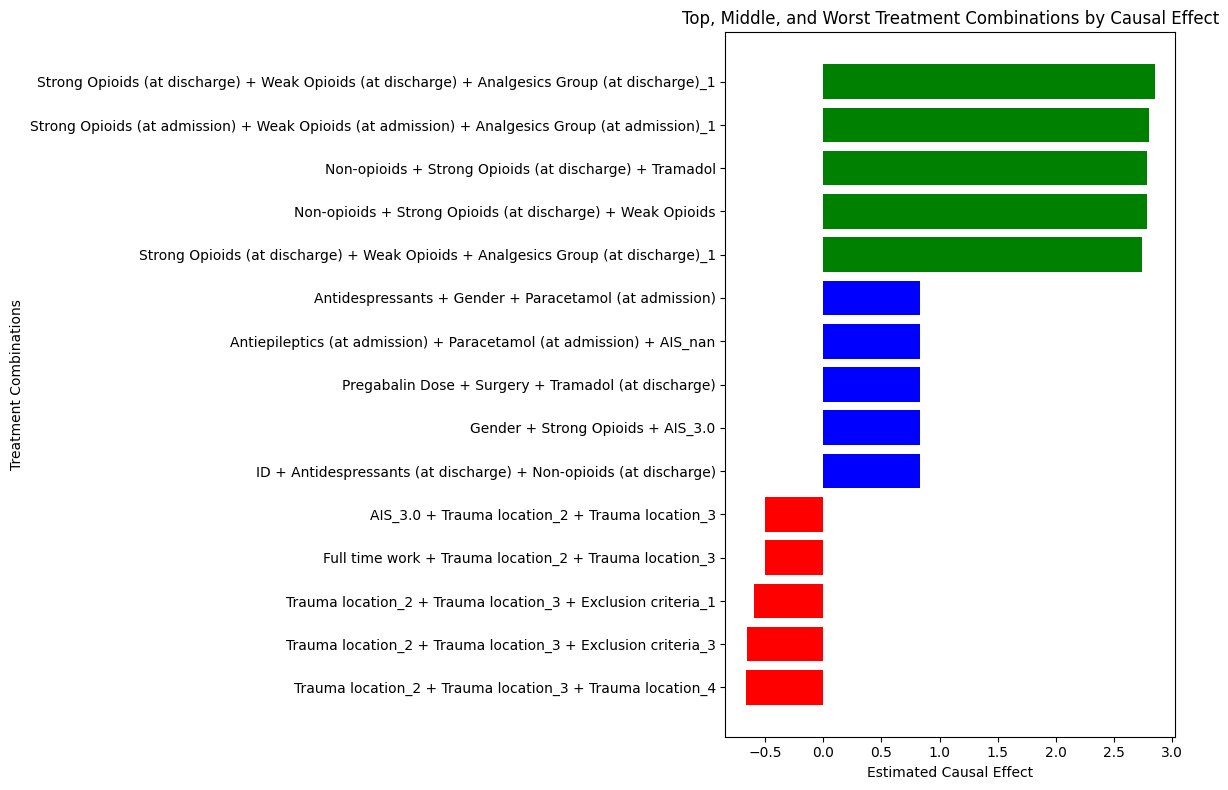

In [ ]:
# Find the top 5, middle 5, and worst 5 combinations
top_5_combinations = results.head(5)  # Top 5
middle_5_combinations = results.iloc[len(results) // 2 - 2: len(results) // 2 + 3]  # Middle 5
worst_5_combinations = results.tail(5)  # Worst 5

# Display the combinations
print("\nTop 5 Combinations of Treatments:")
print(top_5_combinations)

print("\nMiddle 5 Combinations of Treatments:")
print(middle_5_combinations)

print("\nWorst 5 Combinations of Treatments:")
print(worst_5_combinations)

# Combine the subsets into one DataFrame for plotting
combinations_to_plot = pd.concat([top_5_combinations, middle_5_combinations, worst_5_combinations])

# Plot the combinations
plt.figure(figsize=(12, 8))
plt.barh(
    [' + '.join(comb) for comb in combinations_to_plot["Combination"]],  # Combine treatment names for the y-axis
    combinations_to_plot["Causal Effect"],
    color=['green'] * 5 + ['blue'] * 5 + ['red'] * 5  # Color-coded: green (top), blue (middle), red (worst)
)
plt.xlabel("Estimated Causal Effect")
plt.ylabel("Treatment Combinations")
plt.title("Top, Middle, and Worst Treatment Combinations by Causal Effect")
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

## Step 6: SHAP

In [ ]:
# SHAP Analysis
!pip install shap

import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=27, class_weight='balanced')
rf_model.fit(X_train_filtered, y_train)
rf_predictions = cross_val_predict(rf_model, X_train_filtered, y_train, cv=5)


In [ ]:
shap.initjs()

In [ ]:
# Define the target variable
target_variable = "Analgesics Group"

# Separate features and target variable
X_test = test_imputed_df.drop(target_variable, axis=1).reset_index(drop=True)
y_test = test_imputed_df[target_variable].reset_index(drop=True)

In [ ]:
# SHAP
X_train_summary = shap.kmeans(X_train_filtered, 10)
explainer = shap.KernelExplainer(rf_model.predict_proba, X_train_summary)
shap_values = explainer.shap_values(X_train_filtered)
#shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_train_filtered)

  0%|          | 0/3647 [00:00<?, ?it/s]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_train_filtered)